In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:

# --- 1. Data Loading & Exploration ---
# Assuming your data is in a CSV file named 'loan_data.csv'
try:
    df = pd.read_csv('loan-data.csv')
except FileNotFoundError:
    print("Error: 'loan-data.csv' not found.  Please make sure the file exists.")
    exit()


# Display initial data
print("--- Initial Data ---")
print(df.head())
print(df.info())

# Print descriptive statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())



--- Initial Data ---
   CustomerID           Name  Age  LoanAmount  LoanTerm InterestRate  \
0           1    Alice Smith   32       10000        36        6.00%   
1           2    Bob Johnson   25        5000        42        5.00%   
2           3  Charlie Brown   48       20000        30        7.00%   
3           4      David Lee   22        8000        38        6.50%   
4           5    Emily Davis   35       15000        40        5.50%   

  PaymentFrequency        LoanType  CreditScore  Balance  DaysPastDue  \
0          Monthly    PersonalLoan         1200       20            4   
1        Bi-Weekly        Mortgage          950       12            2   
2          Monthly        AutoLoan          950       16            3   
3        Bi-Weekly    PersonalLoan         1300       20            4   
4          Monthly  HomeEquityLoan          850       22            4   

   LoanStatus  ResponseRate  DepositAmount  TotalDeposit  
0           0             0              0      

In [19]:
# --- 2. Missing Value Analysis ---
# Check for missing values in the dataset
# Missing values can cause errors in analysis and may indicate data quality issues
print("\n--- Missing Value Analysis ---")
print(df.isnull().sum())

# --- 3. Data Type Conversion & Cleaning ---
# Convert columns to appropriate data types for proper analysis
# This ensures mathematical operations work correctly and prevents type-related errors
print("\n--- Data Type Conversion & Cleaning ---")

# Convert Age to integer (whole numbers only)
df['Age'] = df['Age'].astype(int)

# Convert LoanAmount to float (decimal numbers for currency)
df['LoanAmount'] = df['LoanAmount'].astype(float)

# Convert LoanTerm to integer (number of months/years)
df['LoanTerm'] = df['LoanTerm'].astype(int)

# Convert InterestRate from percentage string (e.g., "6.00%") to float
# Step 1: Convert to string, Step 2: Remove '%' character, Step 3: Convert to numeric
df['InterestRate'] = pd.to_numeric(df['InterestRate'].astype(str).str.rstrip('%'), errors='coerce')

# Keep PaymentFrequency as string since it contains categorical text values
# (e.g., 'Monthly', 'Weekly', 'Bi-Weekly')
df['PaymentFrequency'] = df['PaymentFrequency'].astype(str)

# Keep LoanType as string for categorical analysis (e.g., 'Personal', 'Mortgage', 'Auto')
df['LoanType'] = df['LoanType'].astype(str)

# Convert CreditScore to integer (whole number credit score)
df['CreditScore'] = df['CreditScore'].astype(int)

# Convert Balance to float (decimal numbers for remaining loan balance)
df['Balance'] = df['Balance'].astype(float)

# Convert DaysPastDue to integer (number of days)
df['DaysPastDue'] = df['DaysPastDue'].astype(int)

# Convert LoanStatus to string for categorical analysis (e.g., 'Current', 'Late', 'Defaulted')
df['LoanStatus'] = df['LoanStatus'].astype(str)







--- Missing Value Analysis ---
CustomerID          0
Name                0
Age                 0
LoanAmount          0
LoanTerm            0
InterestRate        0
PaymentFrequency    0
LoanType            0
CreditScore         0
Balance             0
DaysPastDue         0
LoanStatus          0
ResponseRate        0
DepositAmount       0
TotalDeposit        0
dtype: int64

--- Data Type Conversion & Cleaning ---


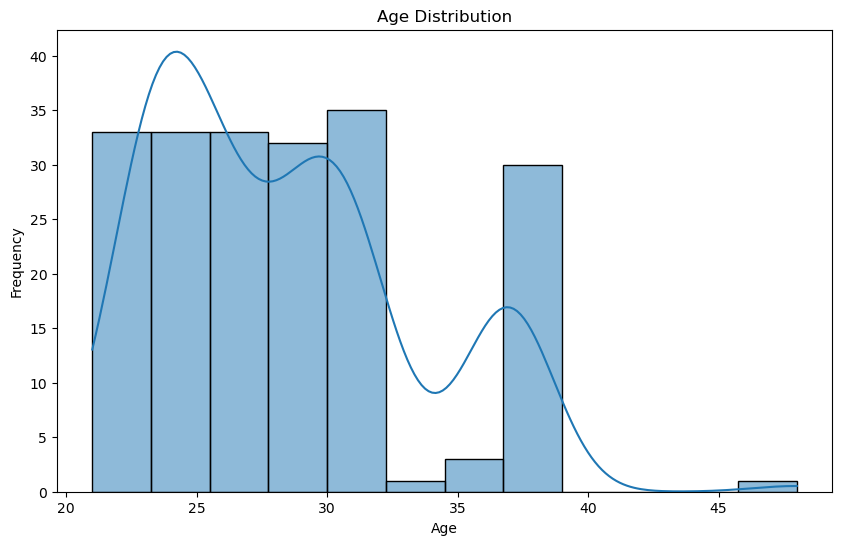

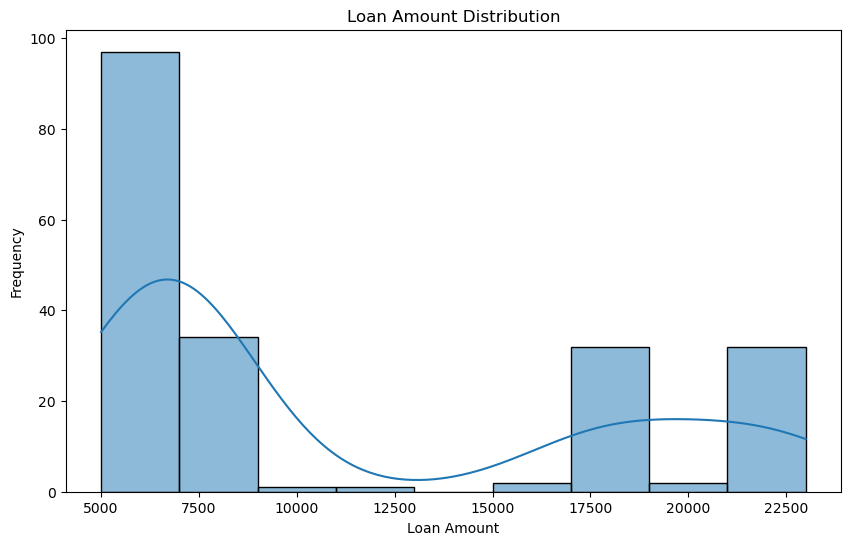

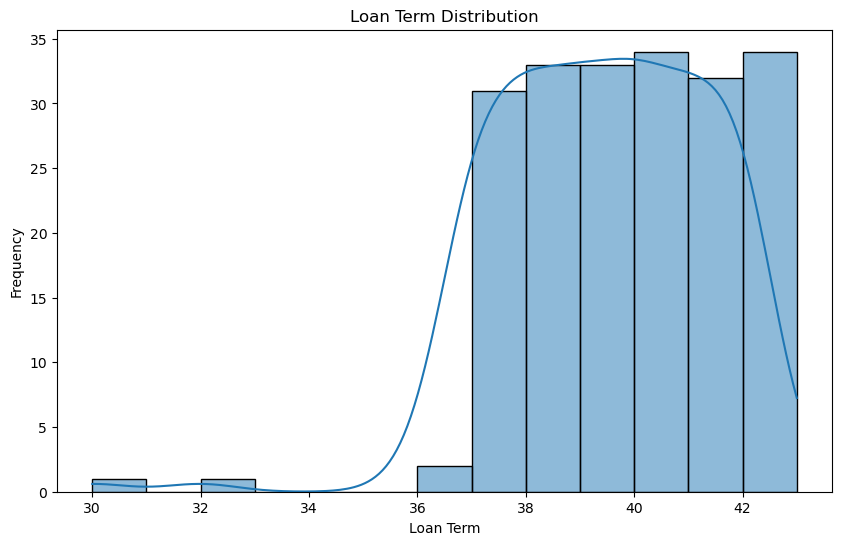

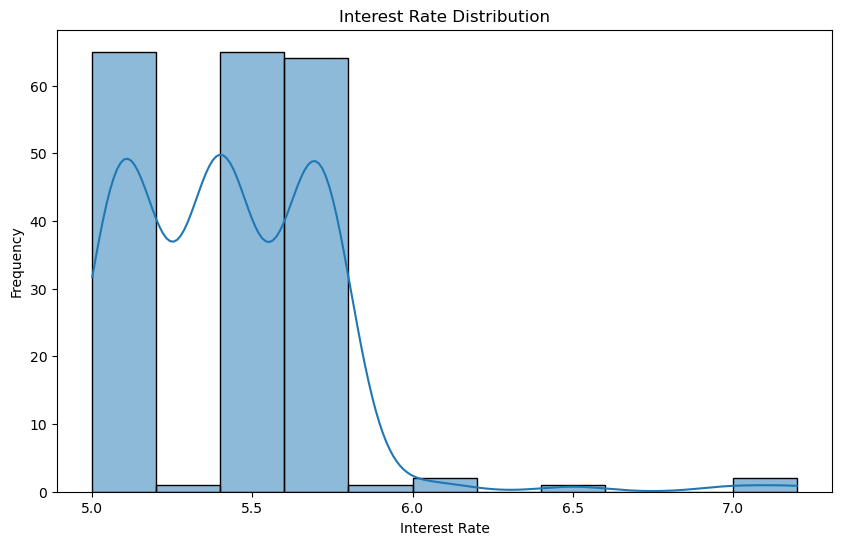

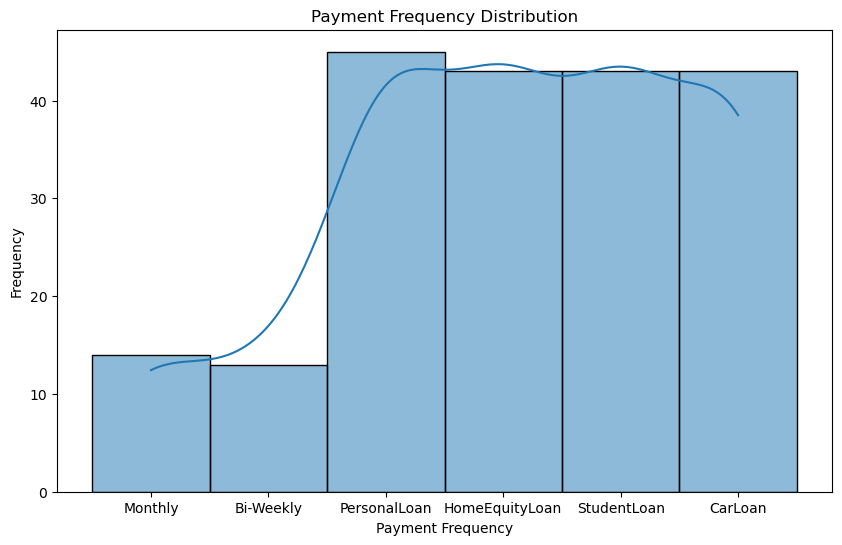

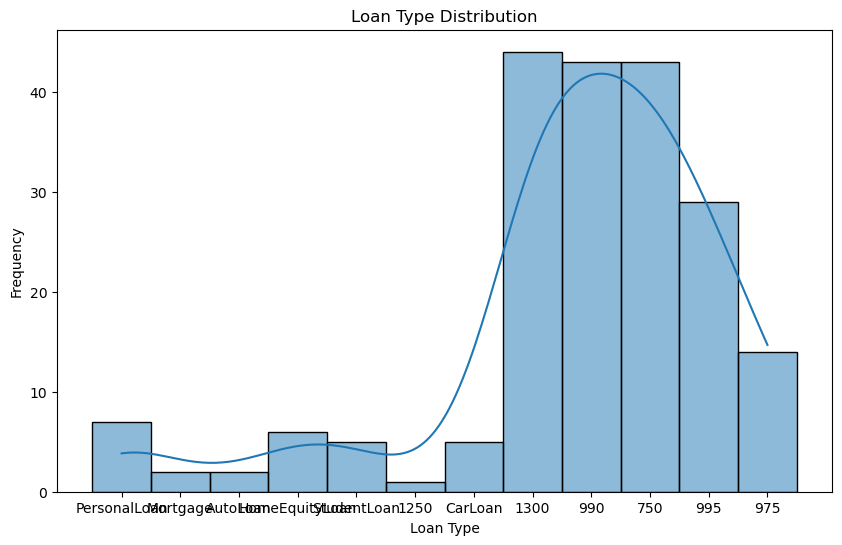

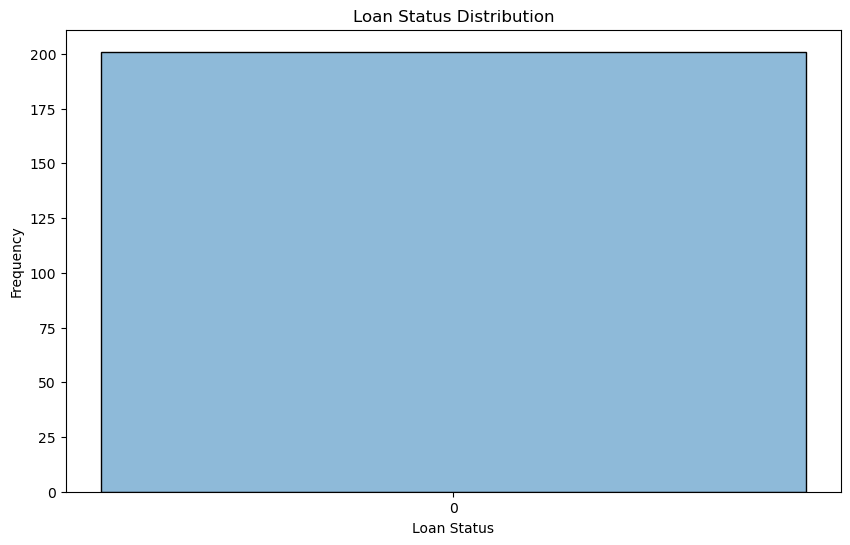

In [20]:
# --- 4.  Distribution & Visualization ---
# Create histograms to understand the distribution of numeric variables
# This helps identify patterns, outliers, and potential biases in the data

# Visualize the distribution of Age
# kde=True adds a smooth curve showing the probability distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Loan Amounts
# Look for: Are most loans small or large? Are there outliers?
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Loan Terms
# This shows the typical length of loans in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanTerm'], kde=True)
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Interest Rates
# Important for identifying potential bias - are rates consistent across groups?
plt.figure(figsize=(10, 6))
sns.histplot(df['InterestRate'], kde=True)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Payment Frequency (categorical)
# Shows how often borrowers make payments
plt.figure(figsize=(10, 6))
sns.histplot(df['PaymentFrequency'], kde=True)
plt.title('Payment Frequency Distribution')
plt.xlabel('Payment Frequency')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Loan Types (categorical)
# Shows the mix of different loan types in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanType'], kde=True)
plt.title('Loan Type Distribution')
plt.xlabel('Loan Type')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Loan Status (categorical)
# Shows how many loans are current, late, or defaulted
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanStatus'], kde=True)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()



--- Categorical Variable Analysis (Correlation) ---
LoanType
1300              44
990               43
750               43
995               29
975               14
PersonalLoan       7
HomeEquityLoan     6
StudentLoan        5
CarLoan            5
Mortgage           2
AutoLoan           2
1250               1
Name: count, dtype: int64


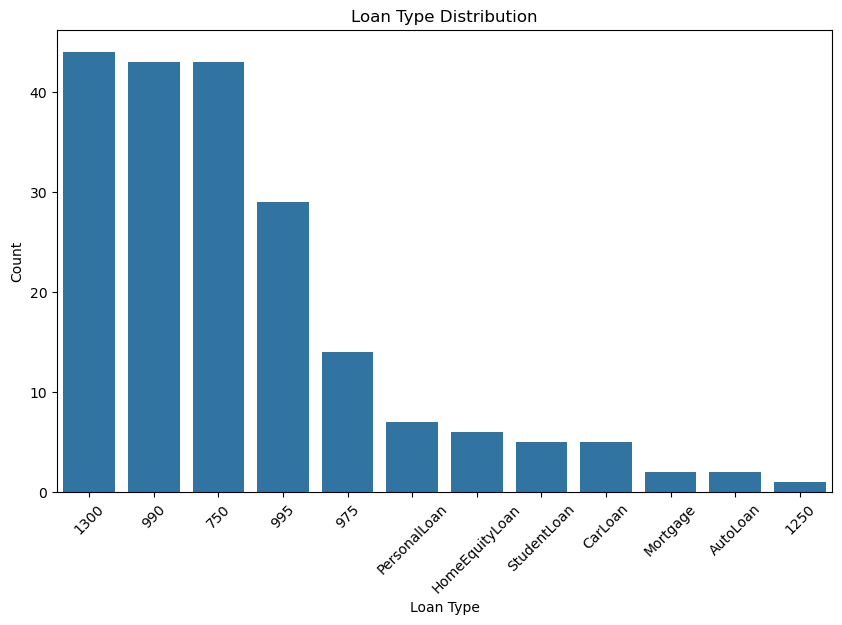

In [21]:
# --- 5.  Categorical Variable Analysis (Simple - Demonstrate Correlation) ---
# Count how many loans exist for each loan type
# This helps understand the composition of the dataset
print("\n--- Categorical Variable Analysis (Correlation) ---")
print(df['LoanType'].value_counts())

# Create a bar chart showing the distribution of loan types
# .index gets the loan type names, .values gets the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=df['LoanType'].value_counts().index, y=df['LoanType'].value_counts().values)
plt.title("Loan Type Distribution")
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()




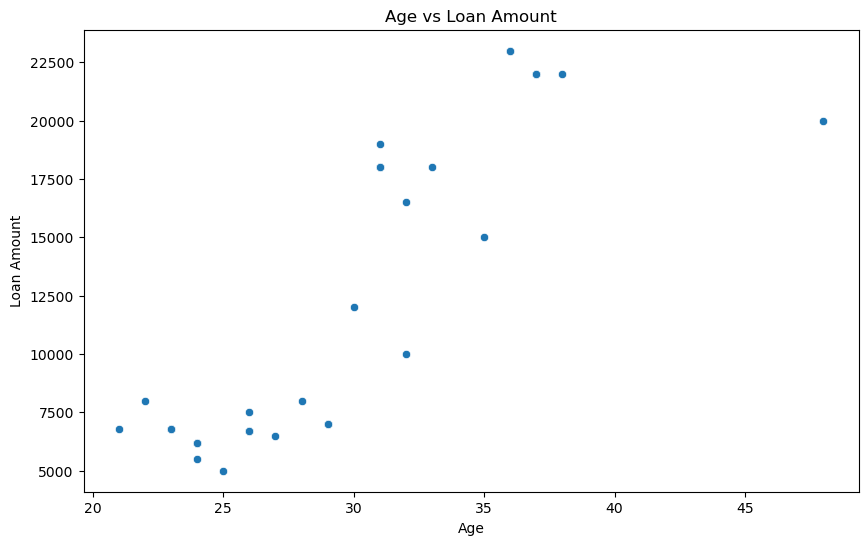

In [22]:
# --- 6.  Potential Bias Indicators - Visual Inspection ---
# Create a scatter plot to see if there's a relationship between Age and Loan Amount
# Potential bias check: Do older/younger people get different loan amounts?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='LoanAmount', data=df)
plt.title('Age vs Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.show()


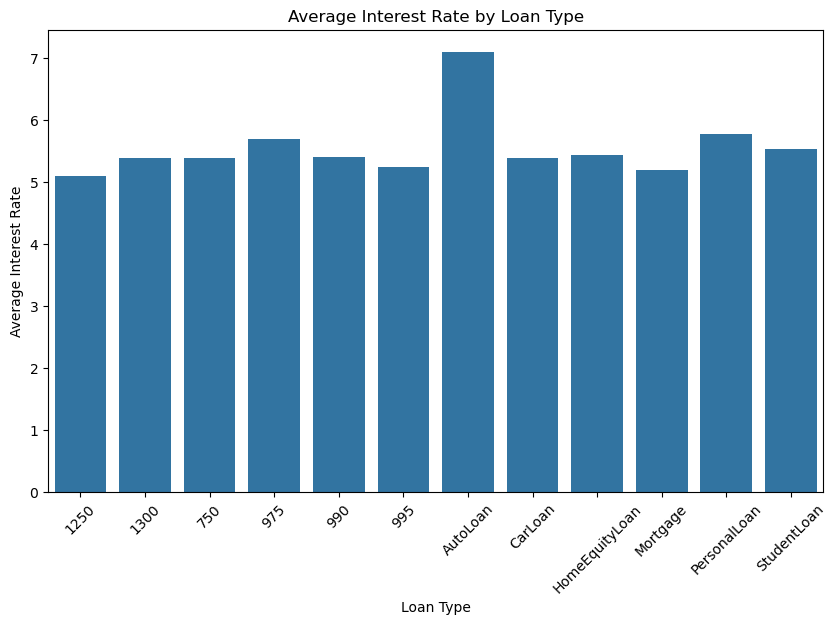


--- Minority Group Analysis (CreditScore Distribution) ---
CreditScore
26      44
19      43
23      43
22      29
20      14
990      4
975      4
1300     3
750      2
950      2
995      1
770      1
1250     1
1200     1
21       1
970      1
1100     1
980      1
650      1
1000     1
1050     1
850      1
780      1
Name: count, dtype: int64


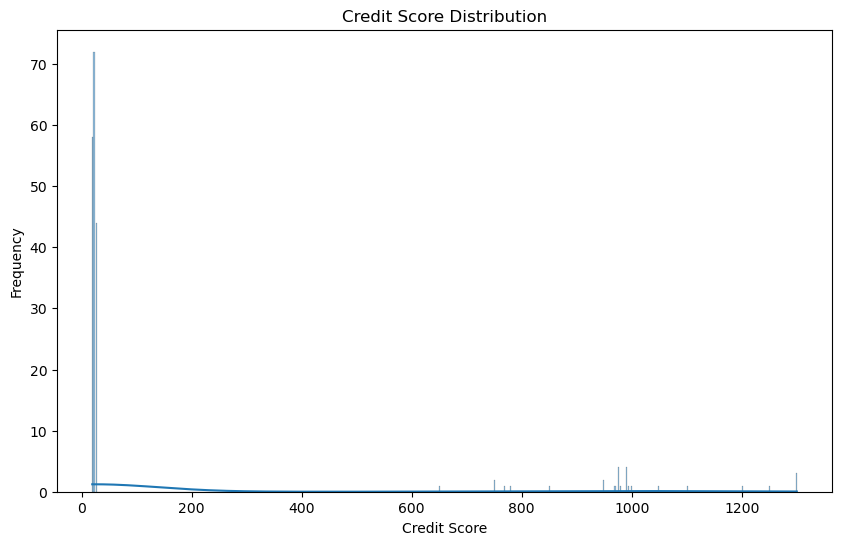

In [23]:
# --- 7.  Profiling &  Visualization -  Explore potential relationships ---
# Analyze if different loan types receive different interest rates on average
# This is important for detecting potential bias in lending practices

# Group data by LoanType and calculate the mean (average) interest rate for each type
grouped_df = df.groupby('LoanType')['InterestRate'].mean()

# Create a bar chart showing average interest rates for each loan type
# grouped_df.index contains the loan type names
# grouped_df.values contains the corresponding average interest rates
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y=grouped_df.values)
plt.title('Average Interest Rate by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# --- 8.  (Optional)  Focus on Minority Groups - Credit Score Analysis ---
# Analyze credit score distribution to understand the borrower profiles
# Low credit scores might indicate vulnerable populations that could face bias
print("\n--- Minority Group Analysis (CreditScore Distribution) ---")

# Count how many borrowers have each credit score
print(df['CreditScore'].value_counts())

# Visualize the distribution of credit scores
# Look for: Are credit scores normally distributed? Are there gaps or clusters?
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], kde=True)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()
